In [34]:
print("d")#test

d


In [35]:
#read house file
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

@mem.cache
def get_data():
    data = load_svmlight_file("D:\\RL\\house.txt")
    return data[0], data[1]

X, y = get_data()
print(y)
print(X)

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9  15.   18.9
  21.7  20.4  18.2  19.9  23.1  17.5  20.2  18.2  13.6  19.6  15.2  14.5
  15.6  13.9  16.6  14.8  18.4  21.   12.7  14.5  13.2  13.1  13.5  18.9
  20.   21.   24.7  30.8  34.9  26.6  25.3  24.7  21.2  19.3  20.   16.6
  14.4  19.4  19.7  20.5  25.   23.4  18.9  35.4  24.7  31.6  23.3  19.6
  18.7  16.   22.2  25.   33.   23.5  19.4  22.   17.4  20.9  24.2  21.7
  22.8  23.4  24.1  21.4  20.   20.8  21.2  20.3  28.   23.9  24.8  22.9
  23.9  26.6  22.5  22.2  23.6  28.7  22.6  22.   22.9  25.   20.6  28.4
  21.4  38.7  43.8  33.2  27.5  26.5  18.6  19.3  20.1  19.5  19.5  20.4
  19.8  19.4  21.7  22.8  18.8  18.7  18.5  18.3  21.2  19.2  20.4  19.3
  22.   20.3  20.5  17.3  18.8  21.4  15.7  16.2  18.   14.3  19.2  19.6
  23.   18.4  15.6  18.1  17.4  17.1  13.3  17.8  14.   14.4  13.4  15.6
  11.8  13.8  15.6  14.6  17.8  15.4  21.5  19.6  15.3  19.4  17.   15.6
  13.1  41.3  24.3  23.3  27.   50.   50.   50.   2

In [36]:
#split dateset
from numpy import *
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#print((X_train))
#print(X_test)
#print(y_train)
#print(y_test)
#print(X_train)
X_train = X_train.todense()
X_test = X_test.todense()
print(X_test.shape[0])
yy = mat(y_train)
yyy = mat(y_test)
#y_train = y_train.todense()
#y_test = y_train,todense()

167


In [37]:
#pare init
w = np.zeros((14,1))
print(w)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [38]:
print(w)
#X_train 339
#X_test 167
b = np.ones((339,1))
c = np.ones((167,1))
#print(b)
X2 = np.column_stack((X_train, b))
X3 = np.column_stack((X_test, c))
print(X2)
print(w)

[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[[-0.770109  -1.         0.293255  ...,  0.913258  -0.100442   1.       ]
 [-0.985038  -1.        -0.43695   ...,  0.899037  -0.278146   1.       ]
 [-0.996893  -0.75      -0.456745  ...,  1.        -0.0386313  1.       ]
 ..., 
 [-0.999805   0.6       -0.886364  ...,  0.969943  -0.764901   1.       ]
 [-0.749262  -1.         0.293255  ..., -0.447627   0.188742   1.       ]
 [-0.995     -1.        -0.406158  ..., -0.644561  -0.50883    1.       ]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [39]:
gl = 2 * X2.T *(X2 * w - yy.T) 
print(gl)
print(w)

[[ 14815.3463636 ]
 [ 10945.954     ]
 [  4720.8952283 ]
 [ 12396.2       ]
 [  5806.59568992]
 [ -2152.28703604]
 [ -4292.19318412]
 [  7506.02685293]
 [  5913.9546474 ]
 [  4184.580356  ]
 [ -1697.77410708]
 [-13491.47916474]
 [  8205.769165  ]
 [-15574.2       ]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


In [40]:
w
n = 0.00001
a = []
b = []
c = []
w
for i in range(100):
    w = w - n * ( 2 * X2.T *(X2 * w - yy.T)  )
    loss = 1/2 * (( yy.T - X2*w ).T ) * ( yy.T - X2 * w)
    lossTest = 1/2 * (( yyy.T - X3*w ).T ) * ( yyy.T - X3 * w)
    a.append(loss)
    print(loss)
    c.append(lossTest)
    b.append(i)

[[ 98595.00661884]]
[[ 93178.77051705]]
[[ 88106.23528486]]
[[ 83355.4315726]]
[[ 78905.79593567]]
[[ 74738.08083558]]
[[ 70834.27040288]]
[[ 67177.50159311]]
[[ 63751.99039044]]
[[ 60542.96273585]]
[[ 57536.58987746]]
[[ 54719.92785966]]
[[ 52080.86088629]]
[[ 49608.04830974]]
[[ 47290.87501377]]
[[ 45119.40497288]]
[[ 43084.33778479]]
[[ 41176.96798573]]
[[ 39389.14697023]]
[[ 37713.24734896]]
[[ 36142.12958813]]
[[ 34669.11078477]]
[[ 33287.93544083]]
[[ 31992.74810833]]
[[ 30778.06778571]]
[[ 29638.76395319]]
[[ 28570.03414236]]
[[ 27567.38294157]]
[[ 26626.60234548]]
[[ 25743.75336233]]
[[ 24915.14879885]]
[[ 24137.33714702]]
[[ 23407.08750237]]
[[ 22721.37544776]]
[[ 22077.3698407]]
[[ 21472.42044649]]
[[ 20904.04636301]]
[[ 20369.92518645]]
[[ 19867.88287049]]
[[ 19395.88423467]]
[[ 18952.02408031]]
[[ 18534.51887503]]
[[ 18141.69896958]]
[[ 17772.00131285]]
[[ 17423.96263314]]
[[ 17096.21305587]]
[[ 16787.47012981]]
[[ 16496.53323565]]
[[ 16222.27835238]]
[[ 15963.65315876]]
[[

In [41]:
print(w)
#a
#b

[[-4.64242195]
 [-2.83017858]
 [-1.76255993]
 [-2.94567225]
 [-2.0040922 ]
 [ 1.29854195]
 [ 0.89276639]
 [-2.24297057]
 [-1.66754301]
 [-1.32819249]
 [-0.14043902]
 [ 4.14940176]
 [-3.30953953]
 [ 4.85708969]]


In [42]:
#loss = 1/2 * (( yy.T - X2*w ).T ) * ( yy.T - X2 * w)

In [43]:
#print(loss)

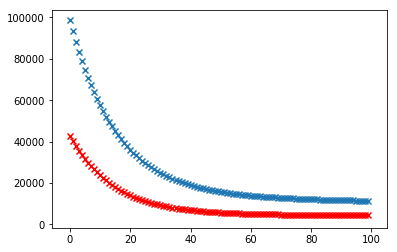

In [44]:
from pylab import *
X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)
Y = [1,5,3]
#plot(Y)
scatter(b,a,marker='x')
scatter(b,c,c = 'r',marker='x')
#plot(b,a)
#plot(b,c,'r')
show()